
For this case study, you will perform a classification task on a WiFi dataset, and also explore the question, "Is more data useful for a classification task?"

The dataset you will use can be found on: https://archive.ics.uci.edu/ml/datasets/ujiindoorloc .

**\[Step 1\]** Once you examine the data sets, you will find that there is a training set and a validation set. You can use them to build your classification model. You might need to determine what are your features and targets. You can also do some engineering on features and targets if necessary.

**\[Step 2\]** But, which algorithm should you use with your model? You can refer to the scikit-learn cheat sheet: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html, and try three algorithms. Some suggestions are: LinearSVC, Logistic Regression, KNN classifier, SVC, Random Forest (as an example of Ensemble Learning) etc. Perform one experiment using each and observe the performance of each model. Note which is the best performing model.

**\[Step 3\]** Once the previous step is done, observe if more data is useful for a classification task using the best performing model from the previous step. For this, randomly select 20% of the training samples, but keep the size of the validation set the same. Note the performance. Then also try with 40%, 60%, 80% and 100% of the training samples. Perform three experiments for each selection. This means, for 20% you will do three experiments, 40% three experiments etc. Find the average of three experiments for each selection and plot them using a chart of your choice.

**\[Step 4\]** Publish your finding in presentation slides. Like case study 1, three of you will be randomly chosen to present your work in front of the class. The slides should inform the audience about:

* the objective of the case study
* the data (features and targets)
* things you have done (e.g. why you selected a specific classification model)
* your findings.


**Things to note**:

* **Type of task**: classification
* **Features**: you choose.
* **Feature engineering**: You are welcome to do so.
* **Target**: Use a combination of features to learn from and identify the location. Ignore the SPACEID column.

* In some cases, Normalization may result in reduced accuracy.
* You must write enough comments so that anybody with some programming knowledge can understand your code.

**Grading Criteria**:

* [15 + 15] Data set preparation: Choosing your $X$ and $y$. Feature Engineering.
* [15 + 15 + 15] Three experiments using three algorithms.  
* [15] Observing the effects of more data using five sets of random samples of different sizes from the training set. 
* [10] Presentation slides

**What to submit**:

Put the Jupyter Notebook file and the .csv file in a folder. Then convert your presentation slides in to a PDF file and put it in the same folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be firstname_lastname_casestudy_2.zip . Upload the .zip file on Canvas.

## Data Cleaning and Feature Engineering

In [55]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_train = pd.read_csv('trainingData.csv')
data_test = pd.read_csv('validationData.csv')

# Print a summary of the Dataset
summary_train = data_train.head(10)
summary_test = data_test.head(10)
display(summary_train.describe())
display(summary_test.describe())
display(summary_train)
display(summary_test)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.00000,10.0,10.0,...,10.0,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,1.000000e+01
mean,100.0,100.0,100.0,100.0,100.0,100.0,100.0,80.30000,100.0,100.0,...,100.0,-7540.418607,4.864938e+06,1.800000,0.900000,106.300000,1.900000,2.90000,22.000000,1.371533e+09
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.29687,0.0,0.0,...,0.0,35.052119,2.423731e+01,0.632456,0.316228,6.325434,0.316228,2.84605,3.162278,5.705406e+05
min,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-97.00000,100.0,100.0,...,100.0,-7632.143600,4.864888e+06,0.000000,0.000000,101.000000,1.000000,2.00000,13.000000,1.369910e+09
25%,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0,100.0,...,100.0,-7540.103525,4.864930e+06,2.000000,1.000000,103.000000,2.000000,2.00000,23.000000,1.371714e+09
50%,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0,100.0,...,100.0,-7530.673650,4.864937e+06,2.000000,1.000000,104.000000,2.000000,2.00000,23.000000,1.371714e+09
75%,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0,100.0,...,100.0,-7520.506900,4.864949e+06,2.000000,1.000000,106.000000,2.000000,2.00000,23.000000,1.371714e+09
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0,100.0,...,100.0,-7510.437173,4.864982e+06,2.000000,1.000000,122.000000,2.000000,11.00000,23.000000,1.371714e+09


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.000000,1.000000e+01,10.000000,10.000000,10.0,10.0,10.0,10.000000,1.000000e+01
mean,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7404.274438,4.864837e+06,2.500000,1.700000,0.0,0.0,0.0,12.600000,1.380959e+09
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,97.859253,4.907821e+01,1.354006,0.674949,0.0,0.0,0.0,7.089899,1.352625e+05
min,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7641.499303,4.864759e+06,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.380873e+09
25%,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7382.738336,4.864827e+06,2.000000,2.000000,0.0,0.0,0.0,12.000000,1.380875e+09
50%,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7370.063481,4.864841e+06,2.500000,2.000000,0.0,0.0,0.0,13.000000,1.380875e+09
75%,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7348.196691,4.864849e+06,3.750000,2.000000,0.0,0.0,0.0,18.250000,1.381086e+09
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7338.807210,4.864922e+06,4.000000,2.000000,0.0,0.0,0.0,21.000000,1.381155e+09


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841
6,100,100,100,100,100,100,100,100,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883
7,100,100,100,100,100,100,100,100,100,100,...,100,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775
8,100,100,100,100,100,100,100,100,100,100,...,100,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307
9,100,100,100,100,100,100,100,100,100,100,...,100,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
5,100,100,100,100,100,100,100,100,100,100,...,100,-7338.807210,4.864825e+06,2,2,0,0,0,12,1380874853
6,100,100,100,100,100,100,100,100,100,100,...,100,-7379.351683,4.864849e+06,3,2,0,0,0,20,1380874982
7,100,100,100,100,100,100,100,100,100,100,...,100,-7340.558777,4.864759e+06,3,2,0,0,0,21,1380875085
8,100,100,100,100,100,100,100,100,100,100,...,100,-7357.531253,4.864766e+06,2,2,0,0,0,12,1380875092
9,100,100,100,100,100,100,100,100,100,100,...,100,-7345.085170,4.864831e+06,0,2,0,0,0,20,1380875118


In [56]:
# get shape of the dataframes
print(data_train.shape)
print(data_test.shape)

(19937, 529)
(1111, 529)


In [57]:
# get column names
print(summary_train.columns)

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)


In [58]:
# delete columns that will not affect my target : 'LONGITUDE', 'LATITUDE',
# 'SPACEID','RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'

data_train = data_train.drop(columns=['LONGITUDE', 'LATITUDE', 'SPACEID','RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])
data_test = data_test.drop(columns=['LONGITUDE', 'LATITUDE', 'SPACEID','RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])

print(data_train.columns)
print(data_test.columns)


Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP513', 'WAP514', 'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519',
       'WAP520', 'FLOOR', 'BUILDINGID'],
      dtype='object', length=522)
Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP513', 'WAP514', 'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519',
       'WAP520', 'FLOOR', 'BUILDINGID'],
      dtype='object', length=522)


In [59]:
data_train.dtypes

WAP001        int64
WAP002        int64
WAP003        int64
WAP004        int64
WAP005        int64
              ...  
WAP518        int64
WAP519        int64
WAP520        int64
FLOOR         int64
BUILDINGID    int64
Length: 522, dtype: object

In [60]:
#Print columns with mising values - Trainig Data

for column in data_train:
    missing_values = sum(pd.isnull(data_train[column]))
    if missing_values > 0:
        print("Column {} has {} missing values".format(data_train[column], missing_values))


In [61]:
#Print columns with mising values - Testing Data

for column in data_test:
    missing_values = sum(pd.isnull(data_test[column]))
    if missing_values > 0:
        print("Column {} has {} missing values".format(data_t[column], missing_values))


In [62]:
#Double check missing values: get count of missing values of the entire dataframe - Trainig Data
data_train.isnull().sum().sum()

0

In [63]:
#Double check missing values: get count of missing values of the entire dataframe - Testing Data
data_test.isnull().sum().sum()

0

In [64]:
# Analize standar deviation of features (WAP)
column_0SD = 0
for column in data_train:
    standar_deviation = data_train[column].std()
    if standar_deviation == 0:
        print("Column {} has a standar deviation equal to {}".format(column, standar_deviation))
        column_0SD += 1
print("Total number of columns with sd = 0: ", column_0SD)

Column WAP003 has a standar deviation equal to 0.0
Column WAP004 has a standar deviation equal to 0.0
Column WAP092 has a standar deviation equal to 0.0
Column WAP093 has a standar deviation equal to 0.0
Column WAP094 has a standar deviation equal to 0.0
Column WAP095 has a standar deviation equal to 0.0
Column WAP152 has a standar deviation equal to 0.0
Column WAP158 has a standar deviation equal to 0.0
Column WAP159 has a standar deviation equal to 0.0
Column WAP160 has a standar deviation equal to 0.0
Column WAP215 has a standar deviation equal to 0.0
Column WAP217 has a standar deviation equal to 0.0
Column WAP226 has a standar deviation equal to 0.0
Column WAP227 has a standar deviation equal to 0.0
Column WAP238 has a standar deviation equal to 0.0
Column WAP239 has a standar deviation equal to 0.0
Column WAP240 has a standar deviation equal to 0.0
Column WAP241 has a standar deviation equal to 0.0
Column WAP242 has a standar deviation equal to 0.0
Column WAP243 has a standar dev

In [65]:
# Delete columns with sd = 0 from the training dataset

print(data_train.shape)
# get number of unique values for each column
counts = data_train.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
data_train.drop(data_train.columns[to_del], axis=1, inplace=True)
print(data_train.shape)

(19937, 522)
[2, 3, 91, 92, 93, 94, 151, 157, 158, 159, 214, 216, 225, 226, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 253, 292, 295, 300, 302, 303, 306, 332, 348, 352, 359, 364, 415, 418, 422, 428, 432, 437, 440, 441, 443, 444, 450, 457, 481, 484, 486, 487, 490, 496, 519]
(19937, 467)


In [66]:
# Delete same 55 columns from the test dataset to get equal number of columns as Training Dataset

print(data_test.shape)
data_test.drop(data_test.columns[to_del], axis=1, inplace=True)
print(data_test.shape)

(1111, 522)
(1111, 467)


In [67]:
#The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM. 
#The positive value 100 is used to denote when a WAP was not detected.
#Positive value 100 is change to -120, considering that -104bbm = extremely poor signal 
data_train_replaced = data_train.replace([100],-120)
data_test_replaced = data_test.replace([100],-120)
data_test_replaced.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,FLOOR,BUILDINGID
0,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,1,1
1,-120,-120,-120,-120,-120,-120,-120,-120,-87,-87,...,-120,-120,-120,-120,-120,-120,-120,-120,4,2
2,-120,-120,-120,-120,-120,-120,-120,-120,-73,-72,...,-120,-120,-120,-120,-120,-120,-120,-120,4,2
3,-120,-120,-120,-120,-120,-120,-120,-120,-77,-75,...,-120,-120,-120,-120,-120,-120,-120,-120,4,2
4,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,2,0


In [68]:
#Combine Building and Floor to creat ONE target 
data_train_replaced['BUILDINGID_FLOOR'] = data_train_replaced['BUILDINGID'].astype(str) + data_train_replaced['FLOOR'].astype(str)
data_test_replaced['BUILDINGID_FLOOR'] = data_test['BUILDINGID'].astype(str) + data_test['FLOOR'].astype(str)
pd.to_numeric(data_train_replaced['BUILDINGID_FLOOR'])
pd.to_numeric(data_test_replaced['BUILDINGID_FLOOR'])
display(data_train_replaced.head())
print(len(set(data_train_replaced['BUILDINGID_FLOOR'])))

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,FLOOR,BUILDINGID,BUILDINGID_FLOOR
0,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,2,1,12
1,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,2,1,12
2,-120,-120,-120,-120,-120,-97,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,2,1,12
3,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,2,1,12
4,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,0,0,00


13


In [69]:
# Delete 'BUILDINGID' and 'FLOOR' columns
data_train_ = data_train_replaced.drop(columns=['BUILDINGID', 'FLOOR'])
data_test_ = data_train_replaced.drop(columns=['BUILDINGID', 'FLOOR'])
data_train_.head()


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,BUILDINGID_FLOOR
0,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,12
1,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,12
2,-120,-120,-120,-120,-120,-97,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,12
3,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,12
4,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,00


In [70]:
data_test_.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,BUILDINGID_FLOOR
0,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,12
1,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,12
2,-120,-120,-120,-120,-120,-97,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,12
3,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,12
4,-120,-120,-120,-120,-120,-120,-120,-120,-120,-120,...,-120,-120,-120,-120,-120,-120,-120,-120,-120,00


In [71]:
# Functions for feature engineering and model performance visualization

def standarize_data(data):
    '''Standarize dataframe features(WAP)'''
    scaler = StandardScaler()
    model = scaler.fit(data)
    scaled_data = model.transform(data)
    df = pd.DataFrame(scaled_data)
    
    return(df)

def increase_plot_size():
    '''Increase size Confusion Matrix'''
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size

def plot_confusion_matrix(matrix, display_labels, title):
    '''Plot Confusion Matrix'''
    increase_plot_size()
    confusion_matrix_display = ConfusionMatrixDisplay(matrix, display_labels=display_labels)
    confusion_matrix_display.plot(values_format='')
    plt.title(title)
    plt.show()


## Feature Label Split

In [72]:
def select_features_labels(data):
    '''Split the columns into Features and labels '''
    features = data.columns[0:-1]
    label = data.columns[-1]
    
    data_features = data[features]
    data_label = data[label]
    
    return(data_features, data_label)


## DecisionTree Classifier

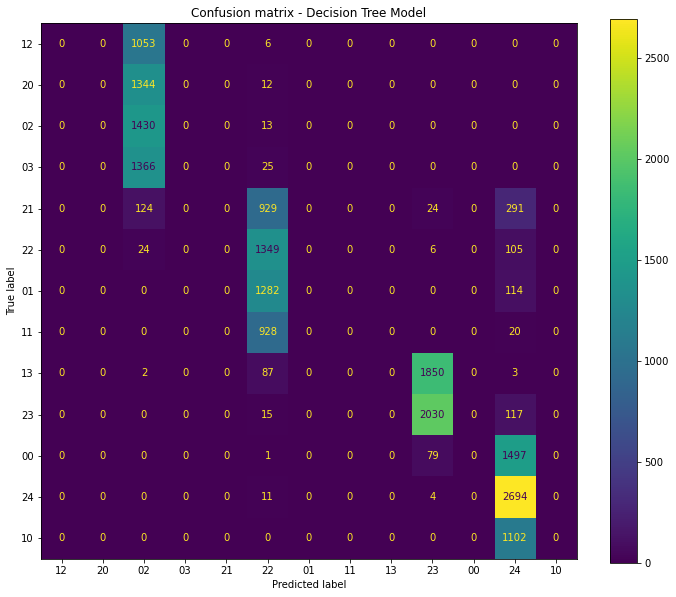


Test Accuracy:  0.376335456688569


In [73]:
from sklearn.tree import DecisionTreeClassifier

def test_decision_tree(X_train, Y_train, X_test, Y_test, using_pca = False, standarize = False, conf_matrix = True):
        
    if standarize:
        X_train = standarize_data(X_train)
        X_test = standarize_data(X_test)
        
    if using_pca:
        # Reduce dimensionality using PCA
        pca = PCA(n_components = 0.99, svd_solver='full')
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
    
    # training a DescisionTreeClassifier
    dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train)
    dtree_predictions = dtree_model.predict(X_test)
 
    if conf_matrix:
        # creating a confusion matrix
        cm = confusion_matrix(Y_test, dtree_predictions)
        plot_confusion_matrix(cm, list(set(Y_test)), 'Confusion matrix - Decision Tree Model')

    #accuracy classification score
    print("\nTest Accuracy: ", accuracy_score(Y_test, dtree_predictions))

X_train, Y_train = select_features_labels(data_train_)
X_test, Y_test = select_features_labels(data_test_)
decision_tree = test_decision_tree(X_train, Y_train, X_test, Y_test, using_pca = True, standarize = True)

## Linear SVM Classifier

C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


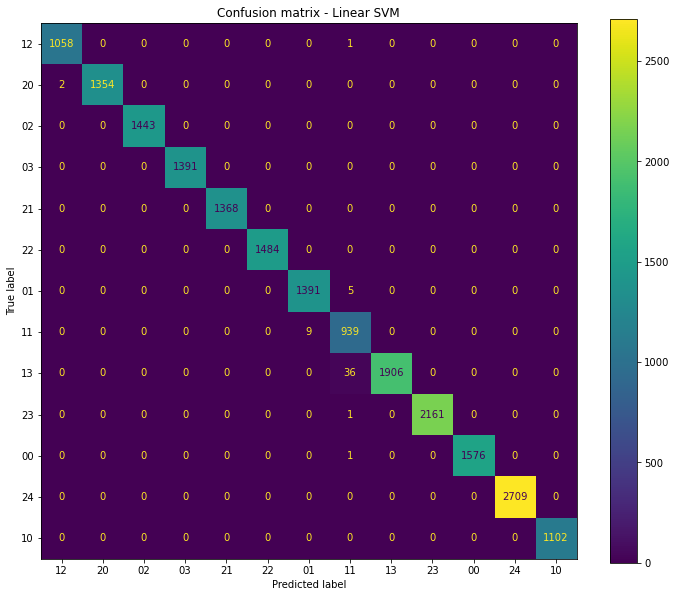


Test Accuracy:  0.9972413101268998


In [79]:
from sklearn.svm import SVC

def test_SVM(X_train, Y_train, X_test, Y_test, using_pca = False, standarize = False, conf_matrix = True):
        
    if standarize:
        X_train = standarize_data(X_train)
        X_test = standarize_data(X_test)
        
    if using_pca:
        # Reduce dimensionality using PCA
        pca = PCA(n_components = 0.99, svd_solver='full')
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

    # training a linear SVM classifier    
    svm_model_linear = SVC(kernel = 'linear', C = 100, max_iter=10000).fit(X_train, Y_train)
    svm_predictions = svm_model_linear.predict(X_test)
 
    # model accuracy for X_test 
    accuracy = svm_model_linear.score(X_test, Y_test)

    if conf_matrix:
        # creating a confusion matrix
        cm = confusion_matrix(Y_test, svm_predictions)
        plot_confusion_matrix(cm, list(set(Y_test)), 'Confusion matrix - Linear SVM')

    #accuracy classification score
    print("\nTest Accuracy: ", accuracy)

X_train, Y_train = select_features_labels(data_train_)
X_test, Y_test = select_features_labels(data_test_)
SVM = test_SVM(X_train, Y_train, X_test, Y_test, using_pca = True, standarize = False)

## KNN Classifier

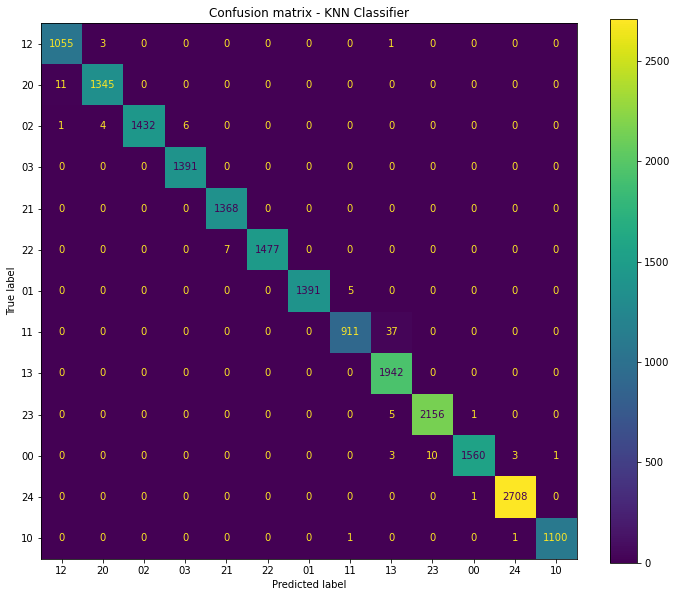


Test Accuracy:  0.994934042233034


In [76]:
from sklearn.neighbors import KNeighborsClassifier

def test_KNN(X_train, Y_train, X_test, Y_test, using_pca = False, standarize = False, conf_matrix = True):
        
    if standarize == True:
        X_train = standarize_data(X_train)
        X_test = standarize_data(X_test)
        
    if using_pca == True:
        # Reduce dimensionality using PCA
        pca = PCA(n_components = 0.99, svd_solver='full')
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

    # training a KNN classifier
    knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, Y_train)
    knn_predictions = knn.predict(X_test)

    # accuracy on X_test
    accuracy = knn.score(X_test, Y_test)
 
    if conf_matrix:
        # creating a confusion matrix
        cm = confusion_matrix(Y_test, knn_predictions)
        plot_confusion_matrix(cm, list(set(Y_test)), 'Confusion matrix - KNN Classifier')

    #accuracy classification score
    print("\nTest Accuracy: ", accuracy)


X_train, Y_train = select_features_labels(data_train_)
X_test, Y_test = select_features_labels(data_test_)
SVM = test_KNN(X_train, Y_train, X_test, Y_test, using_pca = False, standarize = False)

## RandomForest Classifier

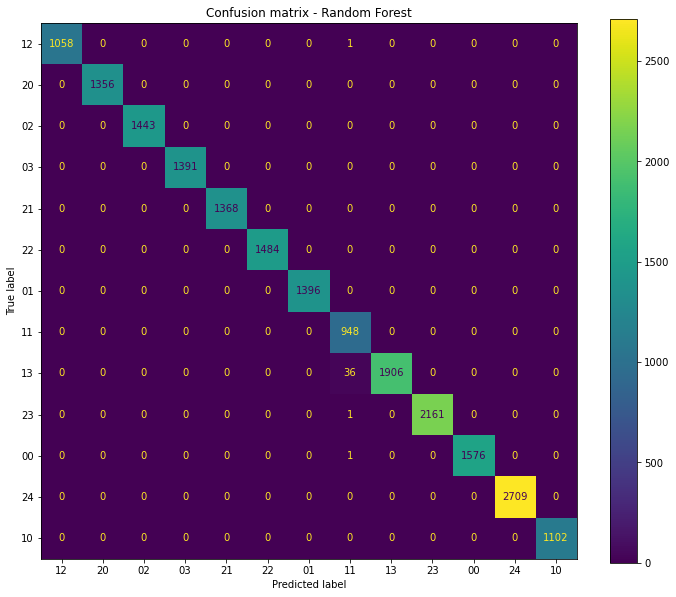


Test Accuracy:  0.9980438380899834


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  

def test_RandomForest(X_train, Y_train, X_test, Y_test, using_pca = False, standarize = False, conf_matrix = True):
        
    if standarize == True:
        X_train = standarize_data(X_train)
        X_test = standarize_data(X_test)
        
    if using_pca == True:
        # Reduce dimensionality using PCA
        pca = PCA(n_components = 0.99, svd_solver='full')
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

    # creating a RF classifier
    clf = RandomForestClassifier(n_estimators = 100)  
  
    # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(X_train, Y_train)
  
    # performing predictions on the test dataset
    y_pred = clf.predict(X_test)
  
    if conf_matrix:
        # creating a confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        plot_confusion_matrix(cm, list(set(Y_test)), 'Confusion matrix - Random Forest')

    #accuracy classification score
    random_forest_accuracy = metrics.accuracy_score(Y_test, y_pred)
    print("\nTest Accuracy: ", random_forest_accuracy)
    return(random_forest_accuracy)
    

X_train, Y_train = select_features_labels(data_train_)
X_test, Y_test = select_features_labels(data_test_)    
random_forest = test_RandomForest(X_train, Y_train, X_test, Y_test, using_pca = True, standarize = False)

## Effects of more data 

In [87]:
# Randomly selecting 20%, 40%, 60%, 80% and 100% of the training samples, but keeping the size of the validation set the same. 
#Perform three experiments for each selection.

training_size = [0.20, 0.40, 0.60, 0.80, 1]
accuracy_score = []

for size in training_size:
    if size == 1:
        X_train2 = X_train
        Y_train2 = Y_train

    else:
    
        X_train2, _, Y_train2, _ = tts(X_train, Y_train, train_size = size)
    
    # Perform RandomForest experiment (winning algorithm)
    accuracy_1 = test_RandomForest(X_train2, Y_train2, X_test, Y_test, using_pca = True, standarize = True, conf_matrix = False)
    accuracy_2 = test_RandomForest(X_train2, Y_train2, X_test, Y_test, using_pca = True, standarize = True, conf_matrix = False)
    accuracy_3 = test_RandomForest(X_train2, Y_train2, X_test, Y_test, using_pca = True, standarize = True, conf_matrix = False)
    
    mean_accuracy = (accuracy_1 + accuracy_2 + accuracy_3) / 3
    accuracy_score.append(mean_accuracy)

accuracy_score


Test Accuracy:  0.9782314290013543

Test Accuracy:  0.979033956964438

Test Accuracy:  0.9774790590359633

Test Accuracy:  0.9905201384360737

Test Accuracy:  0.9909214024176155

Test Accuracy:  0.9904699804383809

Test Accuracy:  0.993830566283794

Test Accuracy:  0.9939308822791794

Test Accuracy:  0.9941315142699504

Test Accuracy:  0.9957867281938105

Test Accuracy:  0.9961879921753524

Test Accuracy:  0.9959873601845814

Test Accuracy:  0.9980438380899834

Test Accuracy:  0.9980438380899834

Test Accuracy:  0.9980438380899834


[0.9782481483339186,
 0.9906371737640233,
 0.993964320944308,
 0.9959873601845816,
 0.9980438380899835]

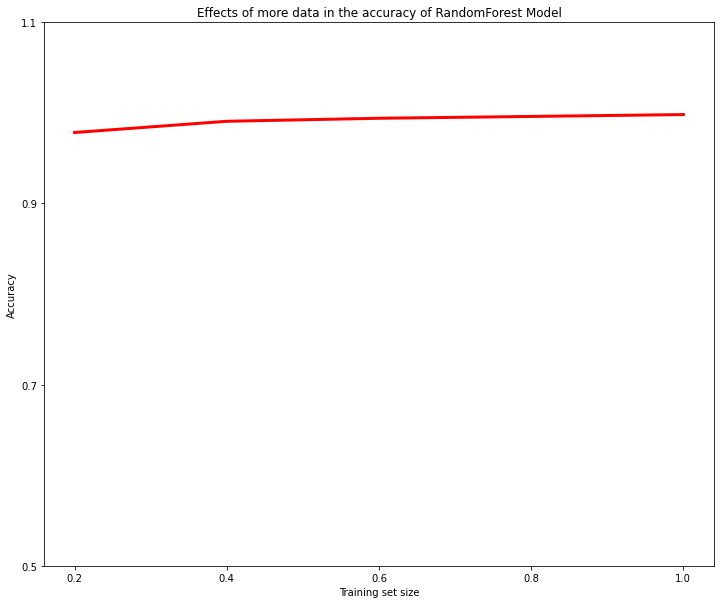

In [92]:
#Plotting the effect of more data in a xyplot

plt.plot(training_size, accuracy_score, linewidth=3, color='red')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
listOf_Xticks = np.arange(0.2, 1.2, 0.2)
plt.xticks(listOf_Xticks)
listOf_Yticks = np.arange(0.5, 1.1, 0.2)
plt.yticks(listOf_Yticks)
plt.title('Effects of more data in the accuracy of RandomForest Model')
plt.show()